In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, svm, model_selection,decomposition,metrics

In [ ]:
#Funções

def aplicando_modelo_svm(kernel, param_grid, X_train_scaled, y_train, X_test_scaled, y_test):
    modelo = svm.SVC(kernel=kernel)
    grid_search = model_selection.GridSearchCV(modelo, param_grid, cv=5)
    grid_search.fit(X_train_scaled, y_train)
    y_pred = grid_search.predict(X_test_scaled)
    return y_pred


def plot_matrix_confusao(y_test, y_pred):
    cm = metrics.confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()

    fig = plt.figure(figsize=(10, 8))

    labels = np.array([
        [f"TN = {tn}", f"FP = {fp}"],
        [f"FN = {fn}", f"TP = {tp}"]
    ])

    sns.heatmap(cm, annot=labels, fmt='', cmap='Greens')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Matriz de Confusão')
    plt.show()


def calculo_metricas(y_test, y_pred):
  accuracy = metrics.accuracy_score(y_test, y_pred)
  precision = metrics.precision_score(y_test, y_pred)
  recall = metrics.recall_score(y_test, y_pred)
  f1_score = metrics.f1_score(y_test, y_pred)
  return accuracy, precision, recall, f1_score

#### Pré processamento


In [ ]:
random_seed = 48
np.random.seed(random_seed)
lb = preprocessing.LabelEncoder()

#Carregando o Dataset
df_titanic = pd.read_csv('https://github.com/cassiusf/datasets/raw/refs/heads/main/titanic_data.csv')

#Eliminando as variáveis “PassengerId”, “Name”, “Ticket” e “Cabin”
df_new = df_titanic.drop(columns=['PassengerId', 'Name', 'Ticket','Cabin'])

#Eliminando observações que contenham dados ausentes (NA)
df_cleaned = df_new.dropna().copy()

#Aplicando o LabelEncoder nas variáveis “Embarked” e “Sex”
df_cleaned['Embarked'] = lb.fit_transform(df_cleaned['Embarked'])
df_cleaned['Sex'] = lb.fit_transform(df_cleaned['Sex'])

#Separando o dataframe resultante em Treino-Teste, utilizando a proporção 75-25%
features = df_cleaned.drop(columns=['Survived'])
target = df_cleaned['Survived']
X_train, X_test, y_train, y_test = model_selection.train_test_split(features, target, test_size=0.25, random_state=random_seed)

#Escalonamento
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


df_cleaned.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


### Aplicando um modelo SVM utilizando um Kernel linear

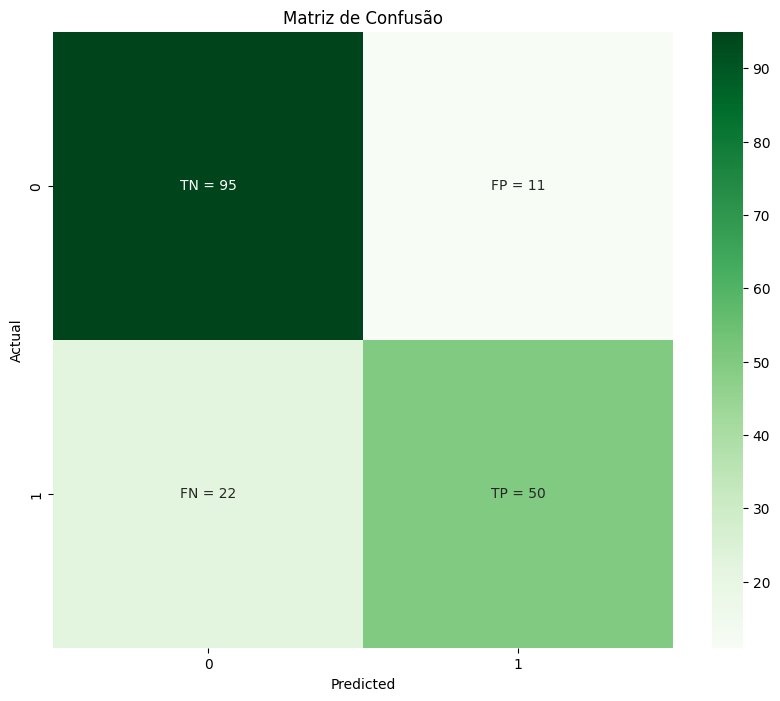

SVM Kernel linear

Acurácia: 81.46%
Precision: 0.82
Recall: 0.69
F1-Score: 0.75


In [ ]:
param_grid_linear = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

pred_linear = aplicando_modelo_svm('linear', param_grid_linear, X_train_scaled, y_train, X_test_scaled, y_test)


# Apresentando a matriz de confusão resultante do processo de treinamento.
cm_linear = plot_matrix_confusao(y_test, pred_linear)


#Apresentando as métricas acurácia, precision, recall e F1-score deste modelo

accuracy, precision, recall, f1_score = calculo_metricas(y_test, pred_linear)
print(f"SVM Kernel linear\n")
print(f"Acurácia: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1_score:.2f}")


### Executando o mesmo modelo, agora utilizando dois núcleos diferentes, o rbf e o sigmoid.

In [ ]:
param_grid = {'C': [0.001,0.01, 0.1, 1, 10, 100],
              'gamma':[0.001, 0.01, 1, 10, 100]}


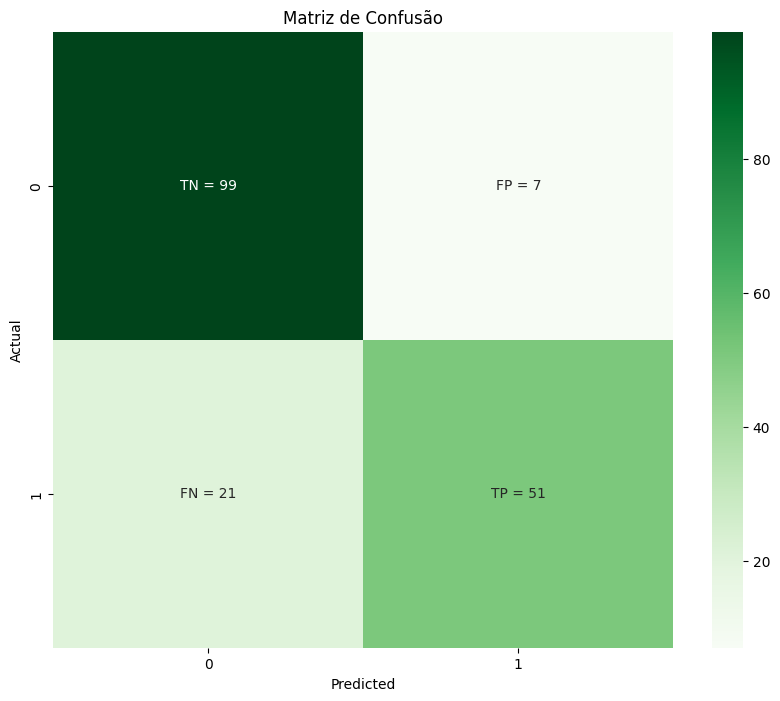

SVM Kernel RBF

Acurácia: 84.27%
Precision: 0.88
Recall: 0.71
F1-Score: 0.78


In [ ]:
# rbf

y_pred_rbf = aplicando_modelo_svm('rbf', param_grid, X_train_scaled, y_train, X_test_scaled, y_test)

# matriz de confusão

cm_rbf = plot_matrix_confusao(y_test, y_pred_rbf)

# métricas acurácia, precision, recall e F1-score

accuracy, precision, recall, f1_score = calculo_metricas(y_test, y_pred_rbf)

print(f"SVM Kernel RBF\n")
print(f"Acurácia: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1_score:.2f}")

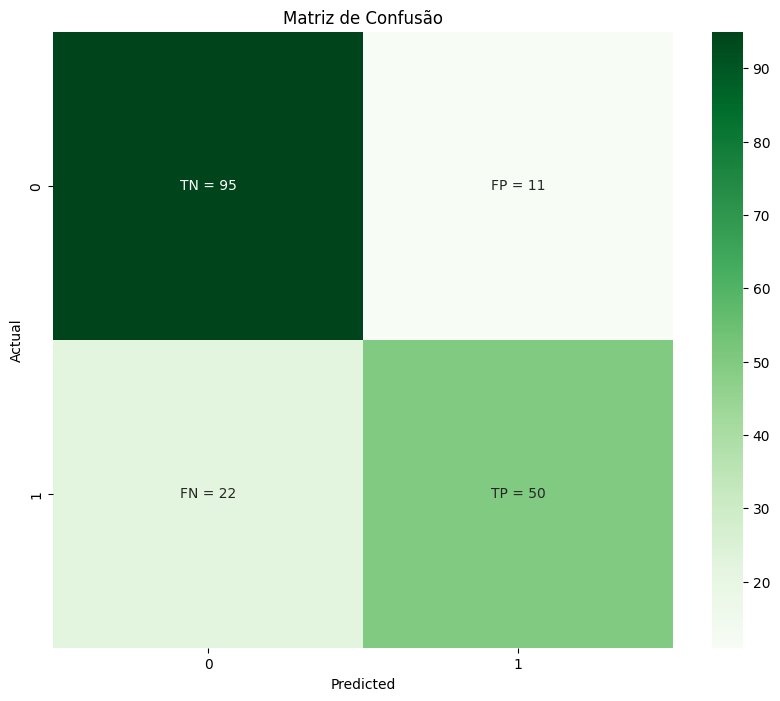

SVM Kernel Sigmoid

Acurácia: 81.46%
Precision: 0.82
Recall: 0.69
F1-Score: 0.75


In [ ]:
# sigmoid

y_pred_sigmoid = aplicando_modelo_svm('sigmoid', param_grid, X_train_scaled, y_train, X_test_scaled, y_test)


# matriz de confusão

cm_sigmoid = plot_matrix_confusao(y_test, y_pred_sigmoid)

# métricas acurácia, precision, recall e F1-score

accuracy, precision, recall, f1_score = calculo_metricas(y_test, y_pred_sigmoid)

print(f"SVM Kernel Sigmoid\n")
print(f"Acurácia: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1_score:.2f}")

### Compare as três execuções (kernel linear, rbf e sigmoid), apresente um resumo dos resultados relevantes e indique qual o melhor, a partir do experimento.

_Os kernels linear e sigmoid apresentaram resultados idênticos em todas as métricas avaliadas. Ambos os modelos alcançaram bons valores de acurácia e precisão, porém exibiram um recall relativamente baixo.Isso indica que, embora consigam classificar corretamente a maioria dos casos previstos como positivos, deixam de identificar uma parcela significativa dos positivos reais, resultando em um número elevado de falsos negativos._
_O kernel RBF foi o que apresentou o melhor desempenho geral, demonstrando maior equilíbrio e consistência entre as métricas. Esse modelo reduziu tanto os falsos positivos quanto os falsos negativos em comparação aos kernels linear e sigmoid, mostrando-se o mais adequado para o conjunto de dados analisado._